In [1]:
import numpy as np
from sklearn import datasets
import matplotlib.pyplot as plt
import tensorflow as tf

/Users/donghoon/anaconda3/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


In [2]:
diabetes = datasets.load_diabetes()

print('데이터 (Data): ', diabetes.data.shape)
print(diabetes.data)
print('함수값 (Responses): ', diabetes.target.shape) 
print(diabetes.target) 

데이터 (Data):  (442, 10)
[[ 0.03807591  0.05068012  0.06169621 ... -0.00259226  0.01990842
  -0.01764613]
 [-0.00188202 -0.04464164 -0.05147406 ... -0.03949338 -0.06832974
  -0.09220405]
 [ 0.08529891  0.05068012  0.04445121 ... -0.00259226  0.00286377
  -0.02593034]
 ...
 [ 0.04170844  0.05068012 -0.01590626 ... -0.01107952 -0.04687948
   0.01549073]
 [-0.04547248 -0.04464164  0.03906215 ...  0.02655962  0.04452837
  -0.02593034]
 [-0.04547248 -0.04464164 -0.0730303  ... -0.03949338 -0.00421986
   0.00306441]]
함수값 (Responses):  (442,)
[151.  75. 141. 206. 135.  97. 138.  63. 110. 310. 101.  69. 179. 185.
 118. 171. 166. 144.  97. 168.  68.  49.  68. 245. 184. 202. 137.  85.
 131. 283. 129.  59. 341.  87.  65. 102. 265. 276. 252.  90. 100.  55.
  61.  92. 259.  53. 190. 142.  75. 142. 155. 225.  59. 104. 182. 128.
  52.  37. 170. 170.  61. 144.  52. 128.  71. 163. 150.  97. 160. 178.
  48. 270. 202. 111.  85.  42. 170. 200. 252. 113. 143.  51.  52. 210.
  65. 141.  55. 134.  42. 111.  98

In [3]:
diabetes_X = diabetes.data
diabetes_y = diabetes.target

diabetes_X_train = diabetes_X[:-20, :]
diabetes_X_test = diabetes_X[-20:, :]

diabetes_y_train = diabetes.target[:-20]
diabetes_y_test = diabetes.target[-20:]

print('학습 데이터 (Training data): ', diabetes_X_train.shape) 
print('시험 데이터 (Test data): ', diabetes_X_test.shape) 
print( '학습 함수값 (Training responses): ', diabetes_y_train.shape)
print( '시험 함수값 (Test responses): ', diabetes_y_test.shape)

학습 데이터 (Training data):  (422, 10)
시험 데이터 (Test data):  (20, 10)
학습 함수값 (Training responses):  (422,)
시험 함수값 (Test responses):  (20,)


In [4]:
diabetes_X_1d = diabetes.data[:, 2]
print(diabetes_X_1d.shape)
diabetes_X_1d = diabetes_X_1d.reshape((len(diabetes_X_1d), 1))
print(diabetes_X_1d.shape)
diabetes_X_1d_train = diabetes_X_1d[:-20]
print(diabetes_X_1d_train.shape)
diabetes_X_1d_test = diabetes_X_1d[-20:]
print(diabetes_X_1d_test.shape)

(442,)
(442, 1)
(422, 1)
(20, 1)


In [5]:
learning_rate = 10.0
training_epochs = 1000
display_step = 50

n_samples = diabetes_X_1d_train.shape[0]

In [6]:
X = tf.placeholder("float" , shape=[1,10])
Y = tf.placeholder("float")

W = tf.get_variable(name="weight",shape=[10,1])
b = tf.Variable(np.random.randn(), name="bias")

pred = tf.add(tf.multiply(X, W), b)
obj = tf.reduce_sum(tf.pow(pred - Y, 2)) / (2 * n_samples)
optimizer = tf.train.GradientDescentOptimizer(learning_rate).minimize(obj)

In [7]:
init = tf.global_variables_initializer()

sess = tf.Session()
sess.run(init)

for epoch in range(0, training_epochs):
    for x, y in zip(diabetes_X_train, diabetes_y_train):
        sess.run(optimizer, feed_dict={X: x.reshape(1,-1), Y: y})
    if (epoch + 1) % display_step == 0:
        print("Epoch: ", epoch + 1)

print("최적화 완료") 
print("학습 손실 = ", sess.run(obj, feed_dict={X: diabetes_X_1d_train, Y: diabetes_y_train})) 
print("W = ", sess.run(W))
print("b = ", sess.run(b))

Epoch:  50
Epoch:  100
Epoch:  150
Epoch:  200
Epoch:  250
Epoch:  300
Epoch:  350
Epoch:  400
Epoch:  450
Epoch:  500
Epoch:  550
Epoch:  600
Epoch:  650
Epoch:  700
Epoch:  750
Epoch:  800
Epoch:  850
Epoch:  900
Epoch:  950
Epoch:  1000
최적화 완료


ValueError: Cannot feed value of shape (422, 1) for Tensor 'Placeholder:0', which has shape '(1, 10)'

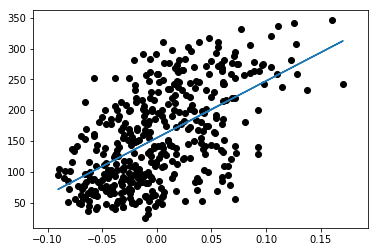

시험 손실 =  70147.36


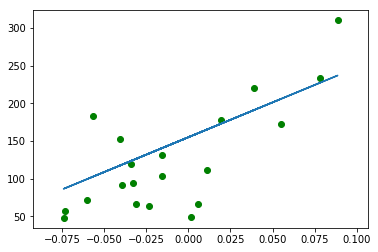

In [8]:
plt.scatter(diabetes_X_1d_train, diabetes_y_train, color='black')
plt.plot(diabetes_X_1d_train, sess.run(W) * diabetes_X_1d_train + sess.run(b))
plt.show()

test_loss = sess.run(tf.reduce_sum(tf.pow(pred - Y, 2)) / (2 * diabetes_X_1d_test.shape[0]), 
                     feed_dict={X: diabetes_X_1d_test, Y: diabetes_y_test})
print("시험 손실 = ", test_loss) 

plt.scatter(diabetes_X_1d_test, diabetes_y_test, color='green')
plt.plot(diabetes_X_1d_test, sess.run(W) * diabetes_X_1d_test + sess.run(b))
plt.show()